#Week 3 Exercise

In [140]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#Newton's method

Let us do someting a bit more efficient than bisection. Suppose that we want to solve  $x^3 - x = 1$ using Newtons's method with initial guess at $x=2$. If you start to get lost, PLOT!.

1) What is the function that we are trying to find intercept? Plot it.

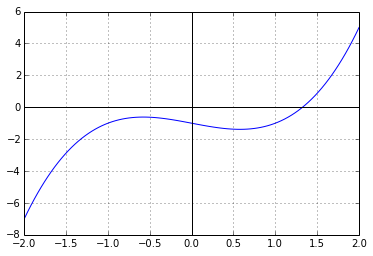

In [7]:
def f(x):
    return (x**3)-x-1

x = np.linspace(-2,2,100)
y = f(x)
plt.plot(x,y)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()

2) What is the slope of the tangent line at $x=2$

In [9]:
def fd(x):
    return 3*(x**2)-1

print "m = " + str(fd(2))

m = 11


3) What is the equation for the tangent line at $x=2$

In [52]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

m = fd(2)
c = f(2)-(m*2)
print "y=%sx%s" % (m,c)

y=11x-17


4) What is the x-intercept of that line? What is the next guess?

In [23]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

m = fd(2.0)
c = f(2.0)-m*2.0

print "(%f,0)" % ((-c)/m)

(1.545455,0)


5) Draw the tangent line along with the function. I want the first triangle in makethis.pdf

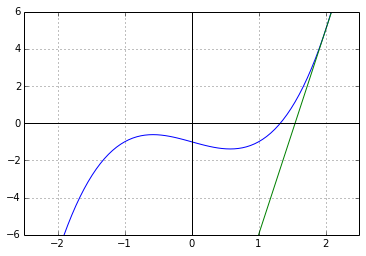

In [65]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

def tangent(x,guess):
    m = fd(guess)
    c = f(guess)-m*guess
    return (m*x) + c

x = np.linspace(-3.0,3.0,100)
y = f(x)
t = tangent(x,2.0)
plt.plot(x,y, color='blue', label='f(x)')
plt.plot(x,t, color='green', label='tangent')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-6.0,6.0)
plt.xlim(-2.5,2.5)
plt.grid()

6) Now find out the general formula for next guess given that the current guess is (x_n).

1.54545454545


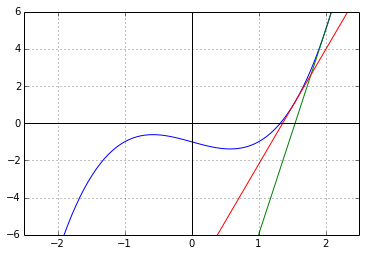

In [92]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

def tangent(x,guess):
    m = fd(guess)
    c = f(guess)-m*guess
    return (m*x) + c

def nextguess(x):
    m = fd(x)
    c = f(x)-m*x
    return ((-c)/m)

x = np.linspace(-3.0,3.0,100)
y = f(x)
t1 = tangent(x,2.0)
guess = nextguess(2.0)
print guess
t2 = tangent(x,guess)
plt.plot(x,y, label='f(x)')
plt.plot(x,t1, label='t1')
plt.plot(x,t2, label='t2')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-6.0,6.0)
plt.xlim(-2.5,2.5)
plt.grid()

7) Iterate Newton's method 4 time and what is your guess for the solution. Verify your answer graphically

1.32471904942


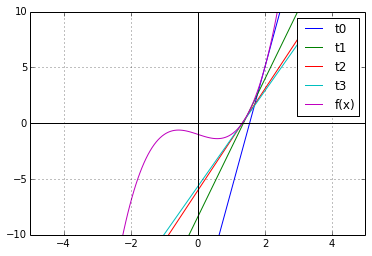

In [91]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

def tangent(x,guess):
    m = fd(guess)
    c = f(guess)-m*guess
    return (m*x) + c

def nextguess(x):
#     m = fd(x)
#     c = f(x)-m*x
#     return ((-c)/m)
    return x - f(x)/fd(x)

def Newton(x,i,guess):
    for n in range(i):
        t = tangent(x,guess)
        plt.plot(x,t, label='t%d'% n)
        guess = nextguess(guess)
    return guess

x = np.linspace(-3.0,3.0,100)
y = f(x)
g = Newton(x,4,2.0)
print g
plt.plot(x,y, label='f(x)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-10.0,10.0)
plt.xlim(-5,5)
plt.legend()
plt.grid()

8) Make a plot that looks like makethis.pdf.

This is how I made the label. (Read the doc)

`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

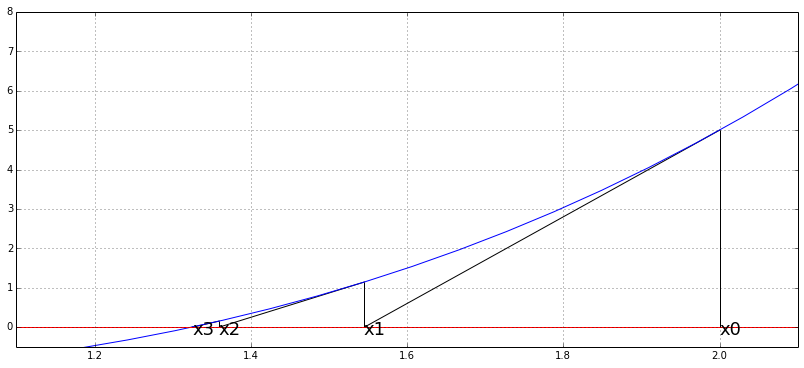

In [130]:
def f(x):
    return (x**3)-x-1

def fd(x):
    return 3*(x**2)-1

def nextguess(x):
    return x - f(x)/fd(x)

plt.figure(figsize=(14,6))
def Newton(i,guess):
    for n in range(i):
        
        x1 = np.linspace(nextguess(guess),guess,100)
        t = tangent(x1,guess)
        plt.vlines(guess,color='black',ymin=0,ymax=f(guess))
        plt.plot(x1,t, color='black')
        plt.annotate('x%d'%n, xy=(guess, 0), xytext=(guess,-0.2),  fontsize=18)
        
        guess = nextguess(guess)
    return guess

x = np.linspace(-3.0,3.0,100)
y = f(x)
g = Newton(4,2.0)
plt.plot(x,y, label='f(x)')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.ylim(-0.5,8.0)
plt.xlim(1.1,2.1)
plt.grid()

9) Does this method guarantee solution for any function and any guess?

In [133]:
print "Only works if the guess has slope!=0 (guess tangent must intercept the x-axis for this method to work)."
print "Doesn't work if fd(xn)=0 too."

Only works if the guess has slope!=0 (guess tangent must intercept the x-axis for this method to work).
Doesn't work if fd(xn)=0 too.


10) What are pros and cons of Newtons' Method vs bisection?

In [134]:
print """
Pros:-
-Newton's Method (Quadratic convergence) reaches smaller error values much faster than bisection method (Linear convergence).
"""

print """
Cons:-
-Newton's Method doesn't work for some guesses(e.g. where slope=0), whereas bisection works for all guesses.
"""


Pros:-
-Newton's Method (Quadratic convergence) reaches smaller error values much faster than bisection method (Linear convergence).


Cons:-
-Newton's Method doesn't work for some guesses(e.g. where slope=0), whereas bisection works for all guesses.



##Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [143]:
def f(x):
    return x**3

def fd(x):
    return (3*(x*x))

print fd(0.5)

0.75


2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [144]:
def f(x):
    return x**3

def fd(x,h):
    return (f(x+h)-f(x))/h

print fd(0.5,0.1)

0.91


3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

In [148]:
def f(x):
    return x**3

def fd(x,h):
    return (f(x+h)-f(x))/h

print fd(0.5,0.001)

0.751501


4) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [154]:
def f(x):
    return x**3

def fd(x,h):
    return (f(x+(h/2))-f(x-(h/2)))/h

print fd(0.5,0.1)

0.7525


5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.001$

In [153]:
def f(x):
    return x**3

def fd(x,h):
    return (f(x+(h/2))-f(x-(h/2)))/h

print fd(0.5,0.001)

0.75000025


6) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

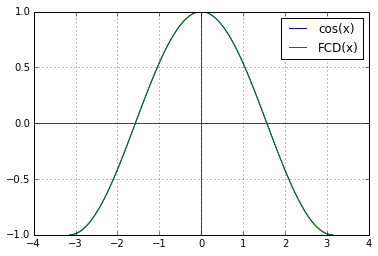

In [177]:
def f(x):
    return np.sin(x)

def fad(x):
    return np.cos(x)

def fcd(x,h):
    return (f(x+(h/2))-f(x-(h/2)))/h

x = np.linspace(-math.pi,math.pi,100)
y1 = fad(x)
y2 = fcd(x,0.001)
plt.plot(x,y1,label='cos(x)')
plt.plot(x,y2,label='FCD(x)')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.grid()
plt.legend()

7) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.001$

In [202]:
def f(x):
    return x**5

def fad(x):
    return 20*(x**3)

def fcd2(x,h):
    return (f(x+h)-(2*f(x))+f(x-h))/(h**2)

print fad(0.5)
print fcd2(0.5,0.001)

# x = np.linspace(-5.0,5.0,100)
# y1 = fad(x)
# y2 = fcd2(x,0.5)
# plt.plot(x,y1,label='FAD(x)')
# plt.plot(x,y2,label='FCD(x)')
# plt.axhline(0, color='red')
# plt.axvline(0, color='red')
# plt.grid()
# plt.legend()

2.5
2.500005


#Edge Detection (probably gonna be part of your homework)

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

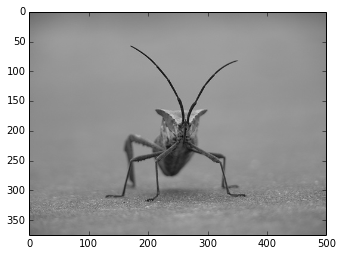

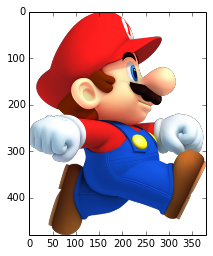

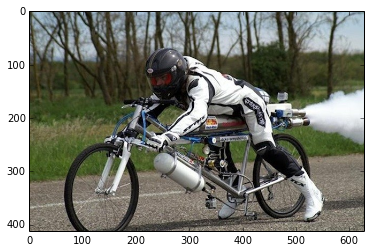

In [203]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [204]:
print stinkbug.shape
print mario.shape
print rocket.shape

(375, 500, 3)
(480, 381, 4)
(412, 628, 3)


3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

3.1) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


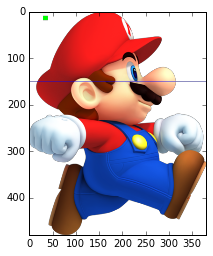

In [28]:
mario [10:20,30:40] = np.array([0,1,0,1])
plt.imshow(mario)

4) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

5) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

6) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

7)Show the result.

8) Wrap all these in a function and try it on other images